# Agglomerative Clustering

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


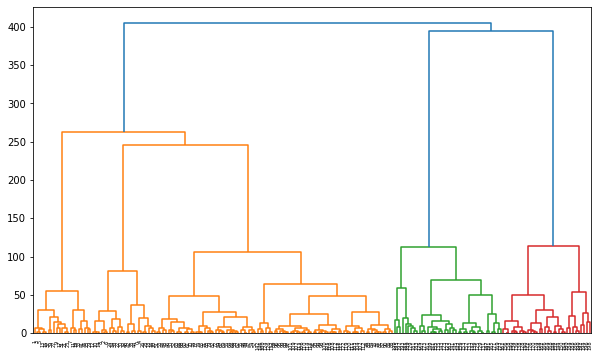

In [ ]:
X = dataset.iloc[:, [3, 4]].values
plt.figure(figsize=(10,6))
z = sch.linkage(X, method='ward')
dendrogram = sch.dendrogram(z)

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)

AgglomerativeClustering(n_clusters=5)

In [ ]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

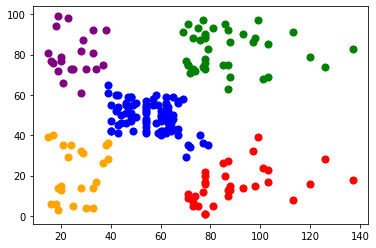

In [ ]:
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

# K-means

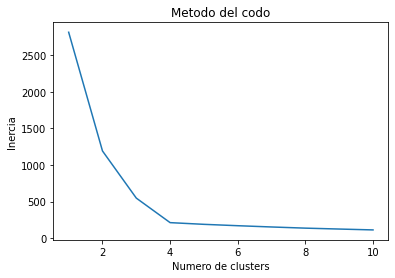

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

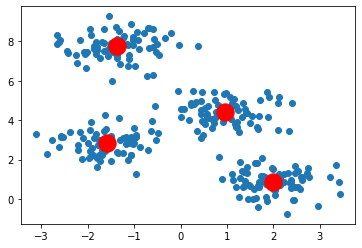

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# DBSCAN

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [ ]:
# Configuracion de datos y parametros
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

In [ ]:
# Generacion de datos
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

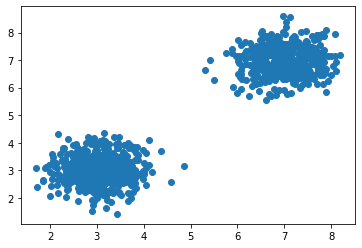

In [ ]:
plt.scatter(X[:,0], X[:,1], # graficamos los puntoa
            #c=y, # coloreamos de acuerdo al grupo simulado
            marker="o")

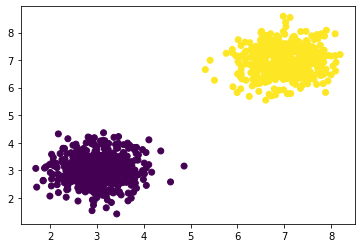

In [ ]:
plt.scatter(X[:,0], X[:,1], # graficamos los puntoa
            c=y, # coloreamos de acuerdo al grupo simulado
            marker="o")

#. clusters estimado: 2
# puntos ruidosos: 0


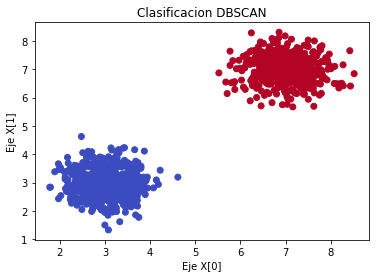

In [ ]:
# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X) # Notemos que únicamente usamos las coordenadas, nunca las etiquetas simuladas!!!
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0) # Ruido (Outliers)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)
# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()

# Actividad Colaborativa

In [1]:
import pandas as pd
df = pd.read_csv("charcters_stats.csv")
df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [2]:
X = df.iloc[:, 2:7]
X

,Intelligence,Strength,Speed,Durability,Power
0,50,31,43,32,25
1,38,100,17,80,17
2,88,14,35,42,35
3,50,90,53,64,84
4,63,80,53,90,55
...,...,...,...,...,...
606,88,10,12,28,12
607,50,10,35,28,31
608,50,100,27,100,83
609,75,10,23,28,100


In [3]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [4]:
Z = sch.linkage(X, 'ward')
Z

array([[  62.        ,  412.        ,    0.        ,    2.        ],
       [   7.        ,    8.        ,    0.        ,    2.        ],
       [  13.        ,  612.        ,    0.        ,    3.        ],
       ...,
       [1215.        , 1217.        ,  639.59210164,  305.        ],
       [1216.        , 1218.        , 1078.78063388,  431.        ],
       [1129.        , 1219.        , 1839.6855888 ,  611.        ]])

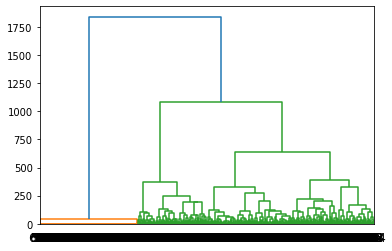

In [ ]:
dendro = sch.dendrogram(Z,  leaf_rotation=0, leaf_font_size =12, orientation = 'top')

In [5]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
agglom.fit(X)
agglom.labels_

array([1, 0, 1, 2, 2, 2, 0, 3, 3, 3, 0, 2, 2, 3, 1, 3, 2, 3, 3, 0, 1, 3,
       0, 2, 1, 1, 2, 3, 2, 2, 1, 0, 2, 3, 0, 0, 2, 1, 2, 3, 3, 2, 3, 1,
       3, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0, 3, 3, 3, 0, 3, 1, 1, 1, 0, 3, 0,
       0, 3, 1, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 3, 3, 0, 2, 3, 2, 2, 3, 3,
       1, 3, 0, 1, 1, 1, 1, 3, 0, 1, 1, 0, 3, 0, 1, 3, 3, 1, 0, 2, 0, 3,
       3, 3, 3, 0, 3, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 0, 1, 3, 1, 2, 0, 1,
       0, 0, 3, 0, 3, 3, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 3, 0, 1, 1, 3, 3,
       3, 3, 0, 0, 3, 0, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 2, 1, 3, 1, 3,
       1, 1, 0, 0, 2, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 3, 0, 3,
       0, 1, 3, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 3, 3, 0, 2, 3, 1, 2, 2,
       1, 3, 2, 1, 0, 0, 2, 3, 3, 0, 0, 0, 0, 1, 3, 1, 0, 3, 2, 1, 3, 1,
       2, 3, 0, 3, 3, 3, 2, 1, 0, 2, 3, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 2,
       3, 2, 2, 2, 1, 0, 0, 1, 1, 0, 3, 3, 3, 3, 0, 1, 3, 2, 3, 1, 3, 3,
       1, 3, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2,

In [6]:
df['cluster_'] = agglom.labels_
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,cluster_
0,3-D Man,good,50,31,43,32,25,52,233,1
1,A-Bomb,good,38,100,17,80,17,64,316,0
2,Abe Sapien,good,88,14,35,42,35,85,299,1
3,Abin Sur,good,50,90,53,64,84,65,406,2
4,Abomination,bad,63,80,53,90,55,95,436,2


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [9]:
pred_y

array([2, 3, 2, 1, 1, 1, 3, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       3, 3, 2, 2, 1, 0, 1, 1, 0, 3, 1, 0, 2, 3, 1, 2, 3, 0, 0, 3, 0, 2,
       0, 0, 0, 0, 3, 3, 2, 0, 3, 2, 3, 0, 0, 0, 2, 0, 2, 2, 2, 3, 0, 3,
       3, 0, 2, 1, 1, 3, 2, 2, 3, 0, 0, 2, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 0, 3, 2, 0, 0, 2, 3, 1, 3, 0,
       0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 2, 3, 2, 0, 2, 2, 0, 0, 3, 3, 2,
       3, 2, 0, 3, 0, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 0, 3, 2, 2, 0, 0,
       0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 3, 1, 2, 0, 2, 0,
       2, 2, 3, 3, 1, 0, 2, 2, 2, 3, 3, 2, 3, 3, 2, 1, 2, 3, 3, 0, 3, 0,
       3, 2, 0, 1, 3, 1, 3, 1, 3, 2, 2, 2, 3, 1, 0, 0, 3, 1, 0, 2, 1, 1,
       2, 0, 3, 2, 3, 2, 3, 0, 0, 2, 3, 3, 2, 2, 0, 0, 3, 0, 1, 2, 0, 2,
       1, 0, 3, 0, 0, 0, 3, 2, 3, 1, 0, 0, 0, 0, 0, 2, 2, 3, 3, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 3, 2, 2, 3, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 1, 3, 2, 3, 3, 1, 3, 3, 2, 3, 2, 1, 3,

In [10]:
df['kmedias'] = pred_y
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,cluster_,kmedias
0,3-D Man,good,50,31,43,32,25,52,233,1,2
1,A-Bomb,good,38,100,17,80,17,64,316,0,3
2,Abe Sapien,good,88,14,35,42,35,85,299,1,2
3,Abin Sur,good,50,90,53,64,84,65,406,2,1
4,Abomination,bad,63,80,53,90,55,95,436,2,1


In [12]:
df["Intelligence"].mean()

44.50245499181669

In [11]:
df.groupby('kmedias')["Intelligence"].mean()

kmedias
0     1.925532
1    75.395604
2    61.434783
3    58.540541
Name: Intelligence, dtype: float64

In [14]:
df.groupby('kmedias')["Strength"].mean()

kmedias
0     1.606383
1    86.142857
2    14.347826
3    47.222973
Name: Strength, dtype: float64

In [15]:
df.groupby('kmedias')["Durability"].mean()

kmedias
0     1.462766
1    89.736264
2    31.956522
3    75.966216
Name: Durability, dtype: float64

# PCA

In [ ]:
# Preprocesado y modelado
from sklearn.decomposition import PCA # modulo de componentes principales
from sklearn.pipeline import make_pipeline # modulo de flujos de analisis
from sklearn.preprocessing import StandardScaler # modulo para escalar variables
from sklearn.preprocessing import scale # modulo para escalar variables
import statsmodels.api as sm # modulo de modelos estadísticos

In [ ]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

Porcentaje de varianza explicada por cada componente
[0.62006039 0.24744129 0.0891408  0.04335752]


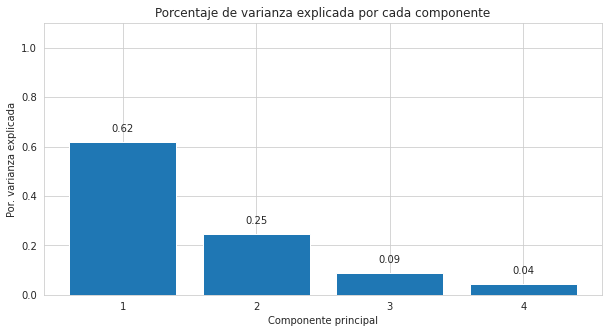

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Text(0, 0.5, 'PC2')

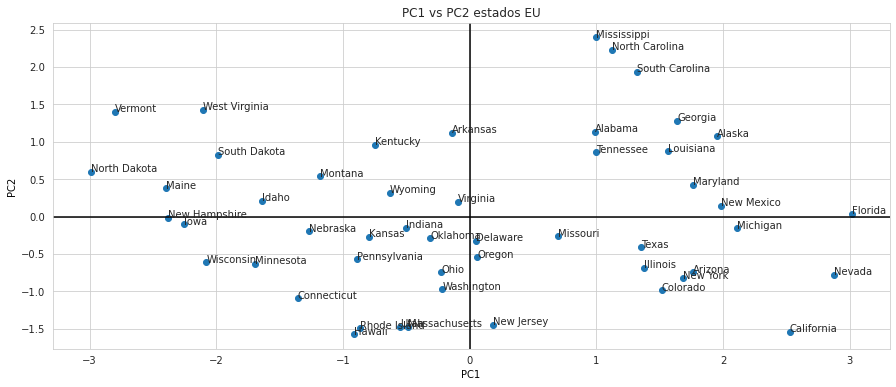

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))
label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black');plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU');plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')